In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import random
import string

In [ ]:
# Rough

# Extracting Information
# Combining Information
# Transforming Information

# Extracting Information

In [17]:
# Let's create a dataframe to work on.

years = np.random.randint(low = 1900, high = 2022, size = 100)
months = np.random.randint(low = 1, high = 13, size = 100)
days = np.random.randint(low = 1, high = 29, size = 100)

dates = []
for i in range(100):
    dates.append(datetime(years[i], months[i], days[i]))

words = []
for i in range(100):
    n = random.randint(3, 10)
    word = ''
    for j in range(n):
        word += random.choice(string.ascii_lowercase)
    words.append(word)


data = {'dates':dates, 'text': words}

df = pd.DataFrame(data = data)

df.head()

,dates,text
0,1928-01-27,zize
1,1930-01-16,rktkipq
2,1995-05-13,zrezrxu
3,2016-11-18,oxbuzylxvi
4,1994-10-27,ezl


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   dates        100 non-null    datetime64[ns]
 1   text_length  100 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.7 KB


In [20]:
# Our algorithm can't understand text data, let's extract the length of each word.
# We will learn more about how to work on text data in NLP section.

df['text_length'] = df['text'].apply(lambda x: len(x))

# Since, we won't use text data. Let's drop it

df = df.drop(columns = 'text')

In [21]:
df.head()

,dates,text_length
0,1928-01-27,4
1,1930-01-16,7
2,1995-05-13,7
3,2016-11-18,10
4,1994-10-27,3


In [40]:
# Our machine learning algorithm can't process the datetime objects also, let's extract data from dates column also.

df['year'] = df['dates'].dt.year
df['month'] = df['dates'].dt.month
df['date'] = df['dates'].dt.day
df['weekday'] = df['dates'].dt.weekday
df['week'] = df['dates'].dt.isocalendar().week

def weekend(date):
    if date.weekday()>=5:
        return 1
    else:
        return 0
    
df['weekend'] = df['dates'].apply(lambda x: weekend(x))

In [41]:
df.head()

,dates,text_length,year,month,date,weekday,week,weekend
0,1928-01-27,4,1928,1,27,4,4,0
1,1930-01-16,7,1930,1,16,3,3,0
2,1995-05-13,7,1995,5,13,5,19,1
3,2016-11-18,10,2016,11,18,4,46,0
4,1994-10-27,3,1994,10,27,3,43,0


In [43]:
# We can now drop dates column

df = df.drop(columns = 'dates')

We have just seen how to extract data, from string dtype and datetime dtype. There are a lot more possibilities in different dtypes. We don't have to extract all this information whenever we find a datetime feature, we have to extract and use the data according to the context of the problem. This is just to show some examples of extraction.

# Combining Information

In [68]:
# Let's create some dataframe to understand how this works

target = []
feat_one = []
feat_two = []
count = 0

for i in range(8, 101, 4):
    operator = random.choice([0, 1])
    if operator==0:
        target.append(i+random.choice([0,1,2,3]))
    else:
        target.append(i-random.choice([0,1,2,3]))
    while True:
        factor = random.choice(range(2, i))
        if i%factor==0:
            feat_one.append(factor)
            feat_two.append(i//factor)
            break
        else:
            continue

In [70]:
data = {'feature_one':feat_one, 'feature_two':feat_two, 'target':target}

df = pd.DataFrame(data = data)

df.head()

,feature_one,feature_two,target
0,2,4,9
1,3,4,11
2,2,8,16
3,2,10,21
4,4,6,27


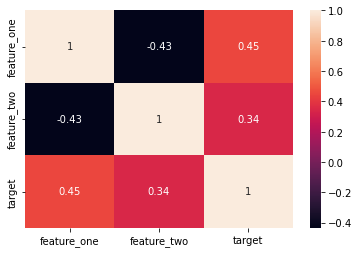

In [75]:
# Let's check how our features are related to the target column

sns.heatmap(df.corr(), annot=True);

# The highest correlation between target and feature columns is 0.45

0.9975551425546405

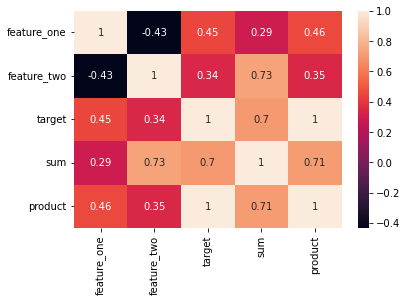

In [83]:
# Now, let's combine these features

df['sum'] = df['feature_one']+df['feature_two']
df['product'] = df['feature_one']*df['feature_two']

# Let's check the correlation again.

sns.heatmap(df.corr(), annot=True)

df.corr()['target'].sort_values(ascending=False)

In [84]:
df.corr()['target']['product']

0.9975551425546405

- After combining the features, we got a feature which has almost 100% correlation with the target column.
- Not just correlation, we can compare the using other feature selection techniques. coefficients in algorithms like linear regression.
- Note: We don't want high correlation between feature columns, but always want high correlation in between target and feature columns.

**This is how combining information help us**

# Transforming Information

## Handling Categorical Features (Encoding)

<a href="https://ibb.co/LkC6Bbr"><img src="https://i.ibb.co/5M5vCtk/Handling-Categorical-Features-Cheat-Sheet.png" alt="Handling-Categorical-Features-Cheat-Sheet" border="0"></a>

important link: 
- https://towardsdatascience.com/all-about-categorical-variable-encoding-305f3361fd02
- https://www.kaggle.com/harishvutukuri/categorical-variable-encoding

In [2]:
# we need to import category_encoders
try: 
    import category_encoders
except:
    !pip install category_encoders
    import category_encoders

In [4]:
# Let's create a simple dataframe for understanding all the encoding techniques

import pandas as pd

data = {'Temperature': ['Hot', 'Cold', 'Very Hot', 'Warm', 'Hot', 'Warm', 'Warm', 'Hot', 'Hot', 'Cold'],
        'Color': ['Red', 'Yellow', 'Yellow', 'Blue', 'Red', 'Blue', 'Blue', 'Yellow', 'Red', 'Yellow'],
        'Target': [1,1,1,0,1,0,1,0,1,1]}

df = pd.DataFrame(data, columns=['Temperature','Color','Target'])

df

,Temperature,Color,Target
0,Hot,Red,1
1,Cold,Yellow,1
2,Very Hot,Yellow,1
3,Warm,Blue,0
4,Hot,Red,1
5,Warm,Blue,0
6,Warm,Blue,1
7,Hot,Yellow,0
8,Hot,Red,1
9,Cold,Yellow,1


In [13]:
print(df['Temperature'].value_counts())
print('\n')
print(df['Color'].value_counts())

Hot         4
Warm        3
Cold        2
Very Hot    1
Name: Temperature, dtype: int64


Yellow    4
Blue      3
Red       3
Name: Color, dtype: int64


### One Hot Encoding

**In this method, we map each category to a vector that contains 1 and 0 denoting the presence or absence of the feature.**

- Used for Nominal Variables
- We represent all n categories in a feature by n-1 encoded features. If we include that left over column, it will create multicollinearity and this is called Dummy Variable Trap. To aviod Dummy Variable Trap, we will only consider n-1 encoded features.
- For Tree based classification method, you can consider all the n encoded features.
- It can be done by <code>pd.get_dummies</code> as well as sklearn's <code>OneHotEncoder</code>

#### Manual way of One hot Encoding

In [7]:
# Let's encode color feature

df['Color'].unique()

array(['Red', 'Yellow', 'Blue'], dtype=object)

In [9]:
red = np.where(df['Color']=='Red', 1, 0)
blue = np.where(df['Color']=='Blue', 1, 0)
yellow = np.where(df['Color']=='Yellow', 1, 0)

one_hot_encoded = pd.DataFrame(data = {"Color_Red":red, "Color_Blue":blue, "Color_Yellow":yellow})

pd.concat([df, one_hot_encoded], axis = 1)

,Temperature,Color,Target,Color_Red,Color_Blue,Color_Yellow
0,Hot,Red,1,1,0,0
1,Cold,Yellow,1,0,0,1
2,Very Hot,Yellow,1,0,0,1
3,Warm,Blue,0,0,1,0
4,Hot,Red,1,1,0,0
5,Warm,Blue,0,0,1,0
6,Warm,Blue,1,0,1,0
7,Hot,Yellow,0,0,0,1
8,Hot,Red,1,1,0,0
9,Cold,Yellow,1,0,0,1


#### Using Sklearn's OneHotEncoder

In [21]:
from sklearn.preprocessing import OneHotEncoder

ohc = OneHotEncoder()
print(ohc.fit_transform(df['Temperature'].values.reshape(-1, 1)).toarray())

array([[0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.]])

In [29]:
ohc.categories_

[array(['Cold', 'Hot', 'Very Hot', 'Warm'], dtype=object)]

In [33]:
ohe = ohc.fit_transform(df['Temperature'].values.reshape(-1, 1)).toarray()

cols = ["Temp_"+str(i) for i in ohc.categories_[0]]

dfOneHot = pd.DataFrame(ohe, columns=cols)

dfoh = pd.concat([df, dfOneHot], axis = 1)

dfoh

,Temperature,Color,Target,Temp_Cold,Temp_Hot,Temp_Very Hot,Temp_Warm
0,Hot,Red,1,0.0,1.0,0.0,0.0
1,Cold,Yellow,1,1.0,0.0,0.0,0.0
2,Very Hot,Yellow,1,0.0,0.0,1.0,0.0
3,Warm,Blue,0,0.0,0.0,0.0,1.0
4,Hot,Red,1,0.0,1.0,0.0,0.0
5,Warm,Blue,0,0.0,0.0,0.0,1.0
6,Warm,Blue,1,0.0,0.0,0.0,1.0
7,Hot,Yellow,0,0.0,1.0,0.0,0.0
8,Hot,Red,1,0.0,1.0,0.0,0.0
9,Cold,Yellow,1,1.0,0.0,0.0,0.0


#### Using Pandas' Get Dummies

In [35]:
# This is very easy to do compared to the previous one

df_ohe = pd.get_dummies(data = df, prefix = ['Temp'], columns = ['Temperature'])

df_ohe

,Color,Target,Temp_Cold,Temp_Hot,Temp_Very Hot,Temp_Warm
0,Red,1,0,1,0,0
1,Yellow,1,1,0,0,0
2,Yellow,1,0,0,1,0
3,Blue,0,0,0,0,1
4,Red,1,0,1,0,0
5,Blue,0,0,0,0,1
6,Blue,1,0,0,0,1
7,Yellow,0,0,1,0,0
8,Red,1,0,1,0,0
9,Yellow,1,1,0,0,0


### Label Encoding

- In Label Encoding, each category is assigned a value from 1 through N (here N is the number of categories for the feature.
- One major issue with this approach is there is no relation or order between these classes, but the algorithm might consider them as some order, or there is some relationship.
- Label Encoding can be done by pandas <code>factorize</code> as well as sklearn's <code>LabelEncoder</code>

#### Manual way of Label Encoding

In [97]:
labels = dict(zip(df['Temperature'].unique(), range(1, df['Temperature'].nunique()+1)))

df_label_enc = df.copy()
df_label_enc['Temp_label_enc'] = df['Temperature'].map(labels)

df_label_enc

,Temperature,Color,Target,Temp_label_enc
0,Hot,Red,1,1
1,Cold,Yellow,1,2
2,Very Hot,Yellow,1,3
3,Warm,Blue,0,4
4,Hot,Red,1,1
5,Warm,Blue,0,4
6,Warm,Blue,1,4
7,Hot,Yellow,0,1
8,Hot,Red,1,1
9,Cold,Yellow,1,2


#### Using Sklearn Label Encoding

In [43]:
from sklearn.preprocessing import LabelEncoder

df_le = df.copy()
df_le['Temp_label_encoded'] = LabelEncoder().fit_transform(df['Temperature'])

df_le

,Temperature,Color,Target,Temp_label_encoded
0,Hot,Red,1,1
1,Cold,Yellow,1,0
2,Very Hot,Yellow,1,2
3,Warm,Blue,0,3
4,Hot,Red,1,1
5,Warm,Blue,0,3
6,Warm,Blue,1,3
7,Hot,Yellow,0,1
8,Hot,Red,1,1
9,Cold,Yellow,1,0


#### Using Pandas Factorize

In [44]:
df_le["Temp_factorize_encoded"] = pd.factorize(df["Temperature"])[0].reshape(-1, 1)

df_le

,Temperature,Color,Target,Temp_label_encoded,Temp_factorize_encoded
0,Hot,Red,1,1,0
1,Cold,Yellow,1,0,1
2,Very Hot,Yellow,1,2,2
3,Warm,Blue,0,3,3
4,Hot,Red,1,1,0
5,Warm,Blue,0,3,3
6,Warm,Blue,1,3,3
7,Hot,Yellow,0,1,0
8,Hot,Red,1,1,0
9,Cold,Yellow,1,0,1


### Integer Encoding/Ordinal Encoding

- Similar to Label Encoding, but there is some order in the categorical values.
- This does NOT mean that all the values that can be arranged in a sequential order are ordinal.
- If you can rank the items based on some scale, It can be called as Ordinal.

Example: If you are calculating sales data and you have weekdays column. We know that We can order the days from Monday to Sunday, if we assign 1 to Monday and so on till 7 to Sunday. Our algorithm will consider Monday<Tues<Wed...<Sun. But, this is doesn't make any sense if you consider only this column.
    
If we consider temperature, we can sort the values from cold<warm<hot<very_hot, this perfectly makes sense considering this column alone.
    
Thus, all the values in any kind of sequences CANNOT become ordinal.

In [45]:
Temp_dict = {
    'Cold' : 1,
    'Warm' : 2,
    'Hot' : 3,
    'Very Hot' : 4
    }

df_oe = df.copy()
df_oe['Temp_ordinal_encoded'] = df['Temperature'].map(Temp_dict)

df_oe

,Temperature,Color,Target,Temp_ordinal_encoded
0,Hot,Red,1,3
1,Cold,Yellow,1,1
2,Very Hot,Yellow,1,4
3,Warm,Blue,0,2
4,Hot,Red,1,3
5,Warm,Blue,0,2
6,Warm,Blue,1,2
7,Hot,Yellow,0,3
8,Hot,Red,1,3
9,Cold,Yellow,1,1


### Helmert Encoding

In Helmert encoding, the mean of the dependent variable for a level is compared to the mean of the dependent variable over all previous levels.

In [46]:
import category_encoders as ce

encoder = ce.HelmertEncoder(cols=['Temperature'], drop_invariant=True)
dfh = encoder.fit_transform(df['Temperature'])
dfhe = pd.concat([df, dfh], axis=1)
dfhe

,Temperature,Color,Target,Temperature_0,Temperature_1,Temperature_2
0,Hot,Red,1,-1.0,-1.0,-1.0
1,Cold,Yellow,1,1.0,-1.0,-1.0
2,Very Hot,Yellow,1,0.0,2.0,-1.0
3,Warm,Blue,0,0.0,0.0,3.0
4,Hot,Red,1,-1.0,-1.0,-1.0
5,Warm,Blue,0,0.0,0.0,3.0
6,Warm,Blue,1,0.0,0.0,3.0
7,Hot,Yellow,0,-1.0,-1.0,-1.0
8,Hot,Red,1,-1.0,-1.0,-1.0
9,Cold,Yellow,1,1.0,-1.0,-1.0


### Binary Encoding

First, do label encoding for the categorical column and them covert those numbers into binary digits, then each binary digit creates one feature column.

#### Manual way of Binary Encoding

<a href="https://ibb.co/YTfJ2HV"><img src="https://i.ibb.co/h12rs3T/binary-encoder.png" alt="binary-encoder" border="0"></a>

In [96]:
# Take the process from label encoding

labels = dict(zip(df['Temperature'].unique(), range(1, df['Temperature'].nunique()+1)))

df_label_enc = df.copy()
df_label_enc['Temp_label_enc'] = df['Temperature'].map(labels)

df_label_enc

,Temperature,Color,Target,Temp_label_enc
0,Hot,Red,1,1
1,Cold,Yellow,1,2
2,Very Hot,Yellow,1,3
3,Warm,Blue,0,4
4,Hot,Red,1,1
5,Warm,Blue,0,4
6,Warm,Blue,1,4
7,Hot,Yellow,0,1
8,Hot,Red,1,1
9,Cold,Yellow,1,2


In [98]:
def decimal_to_binary(val):
    binary_value = ''
    while val:
        binary_value += str(val%2)
        val = val//2
    return binary_value[::-1]

In [105]:
df_label_enc['binary'] = df_label_enc['Temp_label_enc'].apply(lambda x: decimal_to_binary(x))
df_label_enc

,Temperature,Color,Target,Temp_label_enc,binary
0,Hot,Red,1,1,1
1,Cold,Yellow,1,2,10
2,Very Hot,Yellow,1,3,11
3,Warm,Blue,0,4,100
4,Hot,Red,1,1,1
5,Warm,Blue,0,4,100
6,Warm,Blue,1,4,100
7,Hot,Yellow,0,1,1
8,Hot,Red,1,1,1
9,Cold,Yellow,1,2,10


In [106]:
# To match the length of all the values
def match_len(value, max_length):
    if len(value)<max_length:
        diff = max_length - len(value)
        filler = diff*'0'
        return filler+value
    else:
        return value
    
max_len = df_label_enc['binary'].apply(lambda x: len(x)).max()

df_label_enc['binary'] = df_label_enc['binary'].apply(lambda x: match_len(x, max_len))

In [124]:
binary_enc = dict()

columns = ["Temp_"+str(i) for i in range(max_len)]

for i in range(max_len):
    binary_enc[columns[i]]=df_label_enc['binary'].apply(lambda x: x[i])

binary_encoded = pd.DataFrame(data = binary_enc)

pd.concat([df, binary_encoded], axis = 1)

,Temperature,Color,Target,Temp_0,Temp_1,Temp_2
0,Hot,Red,1,0,0,1
1,Cold,Yellow,1,0,1,0
2,Very Hot,Yellow,1,0,1,1
3,Warm,Blue,0,1,0,0
4,Hot,Red,1,0,0,1
5,Warm,Blue,0,1,0,0
6,Warm,Blue,1,1,0,0
7,Hot,Yellow,0,0,0,1
8,Hot,Red,1,0,0,1
9,Cold,Yellow,1,0,1,0


#### Using category encoders library

In [126]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['Temperature'], drop_invariant=True)
dfb = encoder.fit_transform(df['Temperature'])
dfbin = pd.concat([df, dfb], axis=1)

dfbin

,Temperature,Color,Target,Temperature_0,Temperature_1,Temperature_2
0,Hot,Red,1,0,0,1
1,Cold,Yellow,1,0,1,0
2,Very Hot,Yellow,1,0,1,1
3,Warm,Blue,0,1,0,0
4,Hot,Red,1,0,0,1
5,Warm,Blue,0,1,0,0
6,Warm,Blue,1,1,0,0
7,Hot,Yellow,0,0,0,1
8,Hot,Red,1,0,0,1
9,Cold,Yellow,1,0,1,0


### Frequency Encoding

**Frequency Encoding is a way to utilize the frequency of the categories as labels.**

In the cases where the frequency is related somewhat with the target variable, it helps the model to understand and assign the weight in direct and inverse proportion, depending on the nature of the data.

In [135]:
df_fe = df.copy()

freq_enc = (df_fe['Temperature'].value_counts()/len(df)).to_dict()

df_fe['Temp_freq_enc'] = df_fe['Temperature'].map(freq_enc)

df_fe

,Temperature,Color,Target,Temp_freq_enc
0,Hot,Red,1,0.4
1,Cold,Yellow,1,0.2
2,Very Hot,Yellow,1,0.1
3,Warm,Blue,0,0.3
4,Hot,Red,1,0.4
5,Warm,Blue,0,0.3
6,Warm,Blue,1,0.3
7,Hot,Yellow,0,0.4
8,Hot,Red,1,0.4
9,Cold,Yellow,1,0.2


### Mean Encoding/Target Encoding

**Mean encoding is similar to label encoding, except here labels are correlated directly with the target.**

For example, in mean target encoding for each category in the feature label is decided with the mean value of the target variable on a training data.

<a href="https://ibb.co/mNcLwb8"><img src="https://i.ibb.co/nPLHv6C/mean-encoding.png" alt="mean-encoding" border="0"></a>

In [136]:
# Basic Mean Encoding
me = df.groupby('Temperature')['Target'].mean()

dfme = df.copy()
dfme['Temp_mean_encoded'] = df['Temperature'].map(me)

dfme

,Temperature,Color,Target,Temp_mean_encoded
0,Hot,Red,1,0.750000
1,Cold,Yellow,1,1.000000
2,Very Hot,Yellow,1,1.000000
3,Warm,Blue,0,0.333333
4,Hot,Red,1,0.750000
5,Warm,Blue,0,0.333333
6,Warm,Blue,1,0.333333
7,Hot,Yellow,0,0.750000
8,Hot,Red,1,0.750000
9,Cold,Yellow,1,1.000000


In [138]:
# Mean Encoding with Smoothing

# global mean
mean = df['Target'].mean()

# count and mean of each value group
agg = df.groupby('Temperature')['Target'].agg(['count','mean'])
counts = agg['count']
means = agg['mean']
weight = 100

# smoothed mean
smooth = (counts * means + weight * mean) / (counts + weight)

dfme.loc[:, 'Temp_smooth_mean_encoded'] = df['Temperature'].map(smooth)

dfme

,Temperature,Color,Target,Temp_mean_encoded,Temp_smooth_mean_encoded
0,Hot,Red,1,0.750000,0.701923
1,Cold,Yellow,1,1.000000,0.705882
2,Very Hot,Yellow,1,1.000000,0.702970
3,Warm,Blue,0,0.333333,0.689320
4,Hot,Red,1,0.750000,0.701923
5,Warm,Blue,0,0.333333,0.689320
6,Warm,Blue,1,0.333333,0.689320
7,Hot,Yellow,0,0.750000,0.701923
8,Hot,Red,1,0.750000,0.701923
9,Cold,Yellow,1,1.000000,0.705882


**Note**: They tend to OverFit, be cautious in using Mean Encoding

### Weight of Evidence Encoding

**Weight of Evidence (WoE) is a measure of the “strength” of a grouping technique to separate good and bad.**

WoE is well suited for Logistic Regression because the Logit transformation is simply the log of the odds, i.e., ln(P(Goods)/P(Bads))

In [147]:
# probability for target = 1 i.e Good
df_woe = df.groupby('Temperature')['Target'].mean()
df_woe = pd.DataFrame(df_woe)
df_woe = df_woe.rename(columns = {'Target' : 'Good'})

# probability for target != 1 i.e Bad
df_woe['Bad'] = 1 - df_woe['Good']
# adding small value for avoiding Divide by Zero exception
df_woe['Bad'] = np.where(df_woe['Bad'] == 0, 0.000001, df_woe['Bad'])

# compute WoE
df_woe['WoE'] = np.log(df_woe['Good']/df_woe['Bad'])
df_woe

,Good,Bad,WoE
Temperature,,,
Cold,1.000000,0.000001,13.815511
Hot,0.750000,0.250000,1.098612
Very Hot,1.000000,0.000001,13.815511
Warm,0.333333,0.666667,-0.693147


In [148]:
df['Temp_WoE'] = df['Temperature'].map(df_woe['WoE'])

df

,Temperature,Color,Target,Temp_WoE
0,Hot,Red,1,1.098612
1,Cold,Yellow,1,13.815511
2,Very Hot,Yellow,1,13.815511
3,Warm,Blue,0,-0.693147
4,Hot,Red,1,1.098612
5,Warm,Blue,0,-0.693147
6,Warm,Blue,1,-0.693147
7,Hot,Yellow,0,1.098612
8,Hot,Red,1,1.098612
9,Cold,Yellow,1,13.815511


### Probability Ratio Encoding

Probability Ratio Encoding is similar to Weight Of Evidence(WoE), with the only difference is the only ratio of good and bad probability is used instead of logarithmic the ratio of good and bad probabilies

In [149]:
# probability for target = 1 i.e Good
df_pre = df.groupby('Temperature')['Target'].mean()
df_pre = pd.DataFrame(df_woe)
df_pre = df_pre.rename(columns = {'Target' : 'Good'})

# probability for target != 1 i.e Bad
df_pre['Bad'] = 1 - df_pre['Good']
# adding small value for avoiding Divide by Zero exception
df_pre['Bad'] = np.where(df_pre['Bad'] == 0, 0.000001, df_pre['Bad'])

# compute WoE
df_pre['PR'] = df_pre['Good']/df_pre['Bad']
df_pre

,Good,Bad,WoE,PR
Temperature,,,,
Cold,1.000000,0.000001,13.815511,1000000.0
Hot,0.750000,0.250000,1.098612,3.0
Very Hot,1.000000,0.000001,13.815511,1000000.0
Warm,0.333333,0.666667,-0.693147,0.5


In [150]:
df['Temp_PRE'] = df['Temperature'].map(df_pre['PR'])

df

,Temperature,Color,Target,Temp_WoE,Temp_PRE
0,Hot,Red,1,1.098612,3.0
1,Cold,Yellow,1,13.815511,1000000.0
2,Very Hot,Yellow,1,13.815511,1000000.0
3,Warm,Blue,0,-0.693147,0.5
4,Hot,Red,1,1.098612,3.0
5,Warm,Blue,0,-0.693147,0.5
6,Warm,Blue,1,-0.693147,0.5
7,Hot,Yellow,0,1.098612,3.0
8,Hot,Red,1,1.098612,3.0
9,Cold,Yellow,1,13.815511,1000000.0


In [151]:
df.drop(columns=['Temp_WoE', 'Temp_PRE'], inplace=True)

### Hashing Encoding

In Feature Hashing, a vector of categorical variables gets converted to a higher dimensional space of integers, where the distance between two vectors of categorical variables in approximately maintained the transformed numerical dimensional space

In [152]:
encoder = ce.HashingEncoder(cols=['Color'])
dfH = encoder.fit_transform(df['Color'])
dfHash = pd.concat([df, dfH], axis=1)

dfHash

,Temperature,Color,Target,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7
0,Hot,Red,1,0,0,0,0,0,0,0,1
1,Cold,Yellow,1,1,0,0,0,0,0,0,0
2,Very Hot,Yellow,1,1,0,0,0,0,0,0,0
3,Warm,Blue,0,0,1,0,0,0,0,0,0
4,Hot,Red,1,0,0,0,0,0,0,0,1
5,Warm,Blue,0,0,1,0,0,0,0,0,0
6,Warm,Blue,1,0,1,0,0,0,0,0,0
7,Hot,Yellow,0,1,0,0,0,0,0,0,0
8,Hot,Red,1,0,0,0,0,0,0,0,1
9,Cold,Yellow,1,1,0,0,0,0,0,0,0


### Backward Difference Encoding

Similar to Helmert Encoding. In backward difference coding, **the mean of the dependent variable for a level is compared with the mean of the dependent variable for the prior level.**

In [153]:
encoder = ce.BackwardDifferenceEncoder(cols=['Color'])
dfb = encoder.fit_transform(df['Color'])
dfBD = pd.concat([df, dfb], axis=1)
dfBD

,Temperature,Color,Target,intercept,Color_0,Color_1
0,Hot,Red,1,1,-0.666667,-0.333333
1,Cold,Yellow,1,1,0.333333,-0.333333
2,Very Hot,Yellow,1,1,0.333333,-0.333333
3,Warm,Blue,0,1,0.333333,0.666667
4,Hot,Red,1,1,-0.666667,-0.333333
5,Warm,Blue,0,1,0.333333,0.666667
6,Warm,Blue,1,1,0.333333,0.666667
7,Hot,Yellow,0,1,0.333333,-0.333333
8,Hot,Red,1,1,-0.666667,-0.333333
9,Cold,Yellow,1,1,0.333333,-0.333333


### Leave One Out Encoding

This is very similar to target encoding but excludes the current row’s target when calculating the mean target for a level to reduce the effect of outliers.

In [156]:
encoder = ce.LeaveOneOutEncoder(cols=['Color'])
dfl = encoder.fit_transform(df['Color'], df['Target'])
dfLOO = pd.concat([df, dfl], axis=1)

dfLOO

,Temperature,Color,Target,Color
0,Hot,Red,1,1.000000
1,Cold,Yellow,1,0.666667
2,Very Hot,Yellow,1,0.666667
3,Warm,Blue,0,0.500000
4,Hot,Red,1,1.000000
5,Warm,Blue,0,0.500000
6,Warm,Blue,1,0.000000
7,Hot,Yellow,0,1.000000
8,Hot,Red,1,1.000000
9,Cold,Yellow,1,0.666667


### James-Stein Encoding

For feature value, James-Stein estimator returns a weighted average of:

1. The mean target value for the observed feature value.
2. The mean target value (regardless of the feature value).

The James-Stein encoder shrinks the average toward the overall average. It is a target based encoder. James-Stein estimator has, however, one practical limitation — it was defined only for normal distributions.

In [157]:
encoder = ce.JamesSteinEncoder(cols=['Color'])
dfj = encoder.fit_transform(df['Color'], df['Target'])
dfJS = pd.concat([df, dfj], axis=1)

dfJS.head()

,Temperature,Color,Target,Color
0,Hot,Red,1,1.000000
1,Cold,Yellow,1,0.750000
2,Very Hot,Yellow,1,0.750000
3,Warm,Blue,0,0.333333
4,Hot,Red,1,1.000000


### M-estimator Encoding

M-Estimate Encoder is a simplified version of Target Encoder. It has only one hyper-parameter — m, which represents the power of regularization. The higher the value of m results, into stronger shrinking. Recommended values for m is in the range of 1 to 100.

In [158]:
encoder = ce.MEstimateEncoder(cols=['Color'])
dfm = encoder.fit_transform(df['Color'], df['Target'])
dfmE = pd.concat([df, dfm], axis=1)

dfmE

,Temperature,Color,Target,Color
0,Hot,Red,1,0.925
1,Cold,Yellow,1,0.740
2,Very Hot,Yellow,1,0.740
3,Warm,Blue,0,0.425
4,Hot,Red,1,0.925
5,Warm,Blue,0,0.425
6,Warm,Blue,1,0.425
7,Hot,Yellow,0,0.740
8,Hot,Red,1,0.925
9,Cold,Yellow,1,0.740


### CatBoost Encoding

This is very similar to leave-one-out encoding, but calculates the values “on-the-fly”.

In [159]:
encoder = ce.CatBoostEncoder(cols=['Color'])
dfc = encoder.fit_transform(df['Color'], df['Target'])
dfCB = pd.concat([df, dfc], axis=1)

dfCB

,Temperature,Color,Target,Color
0,Hot,Red,1,0.700000
1,Cold,Yellow,1,0.700000
2,Very Hot,Yellow,1,0.850000
3,Warm,Blue,0,0.700000
4,Hot,Red,1,0.850000
5,Warm,Blue,0,0.350000
6,Warm,Blue,1,0.233333
7,Hot,Yellow,0,0.900000
8,Hot,Red,1,0.900000
9,Cold,Yellow,1,0.675000


## Feature Tranformation (Feature Scaling)

Why Transformation of Features Are Required?

For algorithms like Linear Regression which uses Gradient Descent to find the Global Minima, if we don't have all the features in same scale, the comparisons made by our algorithm will be misleading, thus it may not perform well.

    Linear Regression---Gradient Descent ----Global Minima



While, for the algorithms which use Eucledian Distance like Tree based methods, it doesn't matter.

    Algorithms like KNN,K Means,Hierarichal Clustering--- Eucledian Distance

Deep Learning Techniques(Standardization, Scaling)
1. ANN--->GLobal Minima, Gradient
2. CNN 
3. RNN

0-255 pixels

### Types Of Transformation

1. Standardization
2. Scaling to Minimum And Maximum values (Normalization)
3. Scaling To Median And Quartiles (Robust Scaler)
4. Guassian Transformation
    - Logarithmic Transformation
    - Reciprocal Transformation
    - Square Root Transformation
    - Exponential Transformation
    - Box Cox Transformation

### Standardization

In [166]:
df = pd.DataFrame(data = {"Feature": np.random.randint(1, 100, 100)})

df.head()

,Feature
0,26
1,8
2,22
3,21
4,69


<AxesSubplot:xlabel='Feature', ylabel='Count'>

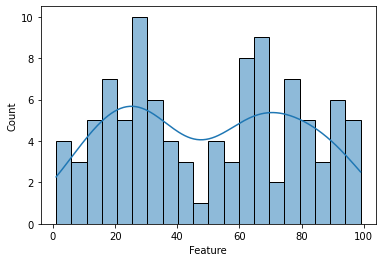

In [167]:
sns.histplot(x = df['Feature'], bins = 20, kde = True)

In [171]:
# Standardization

from sklearn.preprocessing import StandardScaler

st_scaler = StandardScaler()

df_st_scaled = st_scaler.fit_transform(df)

df_st_scaled = pd.DataFrame(data = df_st_scaled, columns=["Scaled_Feature"])

df_st_scaled

,Scaled_Feature
0,-0.855056
1,-1.489214
2,-0.995980
3,-1.031211
4,0.659876
...,...
95,-1.172135
96,0.589415
97,-0.678901
98,-1.348290


### Normalization

In [172]:
# Normalization or Min Max Scaling
# Mostly used in Deep Learning techniques like CNN

from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()

df_mm_scaled = mm_scaler.fit_transform(df)

df_mm_scaled = pd.DataFrame(data = df_mm_scaled, columns=["Scaled_Feature"])

df_mm_scaled

,Scaled_Feature
0,0.255102
1,0.071429
2,0.214286
3,0.204082
4,0.693878
...,...
95,0.163265
96,0.673469
97,0.306122
98,0.112245


### Robust Scaler

It is used to scale the feature to median and quartiles.

1. First Subtract all the values with the median value of that column
2. Then, divide all these features with IQR

In [176]:
# Let's do it manually and check

df["Feature"].head()

0    26
1     8
2    22
3    21
4    69
Name: Feature, dtype: int32

In [209]:
iqr = np.percentile(df["Feature"], 75) - np.percentile(df["Feature"], 25)

(df['Feature']-df['Feature'].median())/iqr

0    -0.55
1    -0.91
2    -0.63
3    -0.65
4     0.31
      ... 
95   -0.73
96    0.27
97   -0.45
98   -0.83
99   -0.45
Name: Feature, Length: 100, dtype: float64

In [187]:
# Now, let's do it with sklearn library

from sklearn.preprocessing import RobustScaler
rb_scaler = RobustScaler()
df_rb_scaler = rb_scaler.fit_transform(df)

pd.DataFrame(df_rb_scaler, columns = ["Robust_Scaled_Feature"])

,Robust_Scaled_Feature
0,-0.55
1,-0.91
2,-0.63
3,-0.65
4,0.31
...,...
95,-0.73
96,0.27
97,-0.45
98,-0.83


### Guassian Transformation

- Our machine learning algorithms perform well with Normal distributed data.
- But in real world problems, most of the features are not normally distributed and there will be some skewness in the features.
- By transforming these features into one of the following transformations, there is a chance that the transformed data will look more like a normal distribution(or Guassian Distribution), so we transform and check.
    - Logarithmic Transformation
    - Reciprocal Transformation
    - Square Root Transformation
    - Exponential Transformation
    - Box Cox Transformation

In [254]:
# Let's create few dataframes to understand the transformations properly
import math

df = pd.DataFrame(np.random.randn(100), columns = ['feat'])

df['log_feat'] =math.e**df['feat']
df['recip_feat'] = 1/df['feat']
df['sq_feat'] = df['feat']**2
df['exp_feat'] = np.log(np.random.randint(low = 10, high = 100, size = 100))  # We just considered e as exponent.

# These features are created for explanation, to show how varaibles look before, how they get transformed into guassian distribution later.

In [349]:
df

,feat,log_feat,recip_feat,sq_feat,exp_feat,log_trans,recip_trans
0,0.448047,1.565252,2.231911,0.200746,2.484907,0.448047,0.802858
1,-0.498756,0.607286,-2.004990,0.248757,4.007333,-0.498756,NaN
2,1.093471,2.984614,0.914519,1.195678,3.178054,1.093471,-0.089357
3,0.460825,1.585381,2.170023,0.212359,4.488636,0.460825,0.774738
4,0.655084,1.925305,1.526521,0.429136,2.397895,0.655084,0.422991
...,...,...,...,...,...,...,...
95,0.990552,2.692719,1.009539,0.981192,4.477337,0.990552,0.009493
96,-1.317617,0.267773,-0.758946,1.736115,2.995732,-1.317617,NaN
97,-0.062381,0.939525,-16.030532,0.003891,4.143135,-0.062381,NaN
98,-0.677567,0.507851,-1.475869,0.459097,3.044522,-0.677567,NaN


In [333]:
# first let's create function to check how close our transformed feature is to a guassian distribution

from scipy import stats

def guas_check(df, feature):
    fig, ax = plt.subplots(figsize = (5, 5))
    _ = stats.probplot(df[feature], plot = ax)

#### Logarithmic Transformation

<AxesSubplot:xlabel='log_feat', ylabel='Count'>

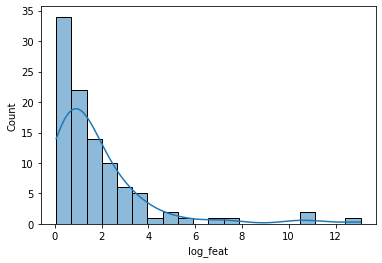

In [335]:
sns.histplot(df['log_feat'], kde=True, bins = 20)

# Right skewed

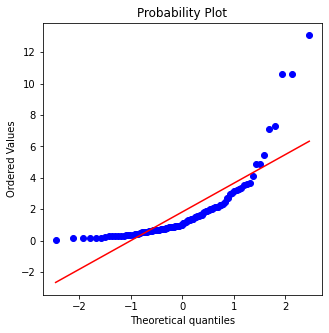

In [336]:
guas_check(df, 'log_feat')

# Not close to normal distribution

In [337]:
# If logarithmic transformation works for this kind of data, then the result would be like this

df['log_trans'] = np.log(df['log_feat'])

<AxesSubplot:xlabel='log_trans', ylabel='Count'>

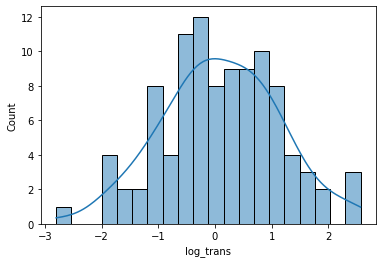

In [338]:
sns.histplot(df['log_trans'], kde=True, bins = 20)

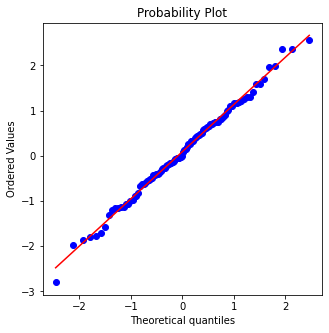

In [340]:
guas_check(df, 'log_trans')

# Very close to a normal distribution

#### Reciprocal Transformation

<AxesSubplot:xlabel='recip_feat', ylabel='Count'>

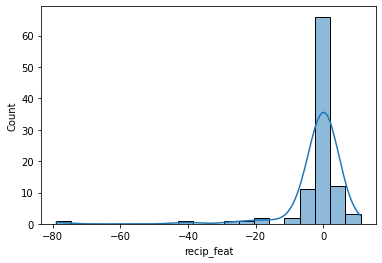

In [341]:
sns.histplot(df['recip_feat'], kde=True, bins = 20)

# Left Skewed

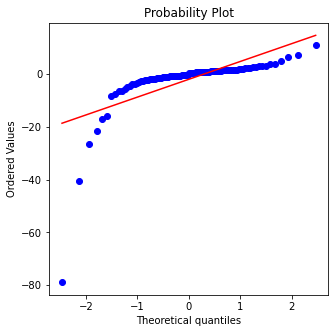

In [347]:
guas_check(df, 'recip_feat')

# not close to normal distribution

In [350]:
# If reciprocal transformation works for this kind of data, then the result would be like this

df['recip_trans'] = 1/df['recip_feat']

<AxesSubplot:xlabel='recip_trans', ylabel='Count'>

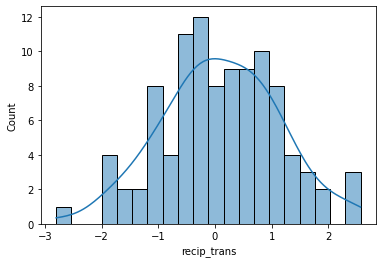

In [351]:
sns.histplot(df['recip_trans'], kde=True, bins = 20)

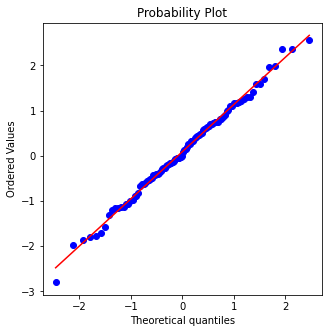

In [352]:
guas_check(df, 'recip_trans')

# Very close to a normal distribution

#### Square Root Transformation

<AxesSubplot:xlabel='sq_feat', ylabel='Count'>

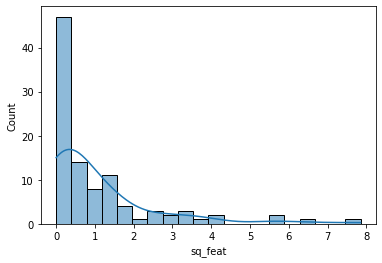

In [354]:
sns.histplot(df['sq_feat'], kde=True, bins = 20)

# Right Skewed

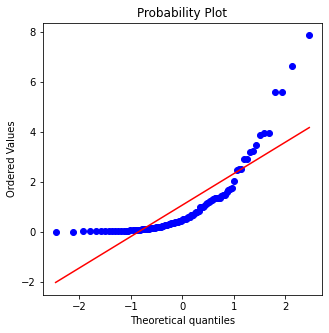

In [355]:
guas_check(df, 'sq_feat')

# not close to normal distribution

In [356]:
# If square root transformation works for this kind of data, then the result would be like this

df['sq_trans'] = df['sq_feat']**0.5

<AxesSubplot:xlabel='sq_trans', ylabel='Count'>

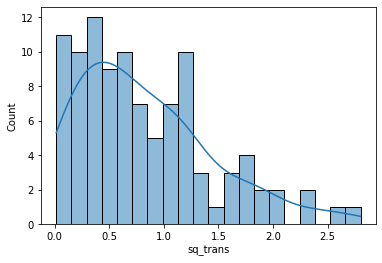

In [357]:
sns.histplot(df['sq_trans'], kde=True, bins = 20)

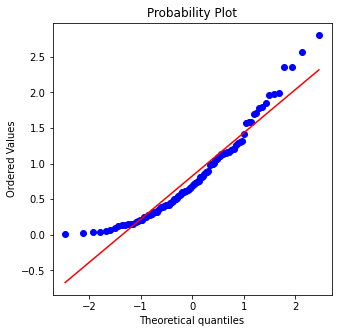

In [358]:
guas_check(df, 'sq_trans')

# Very close to a normal distribution

#### Exponential Transformation

<AxesSubplot:xlabel='exp_feat', ylabel='Count'>

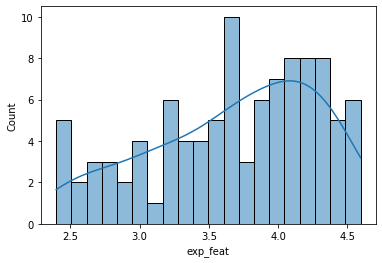

In [359]:
sns.histplot(df['exp_feat'], kde=True, bins = 20)

# Left Skewed

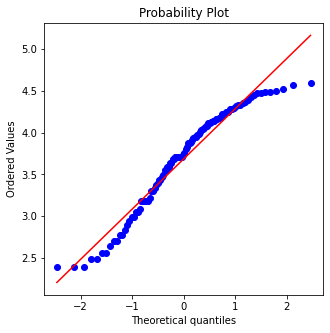

In [360]:
guas_check(df, 'exp_feat')

# not so close to normal distribution

In [361]:
# If exponent transformation works for this kind of data, then the result would be like this
# If we find that e is the proper exponent for this data using some trail and error

df['exp_trans'] = df['exp_feat']**math.e

<AxesSubplot:xlabel='exp_trans', ylabel='Count'>

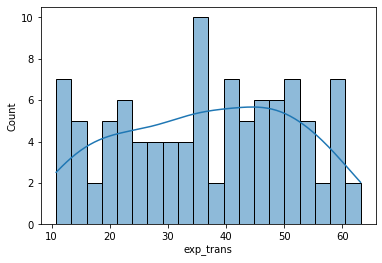

In [362]:
sns.histplot(df['exp_trans'], kde=True, bins = 20)

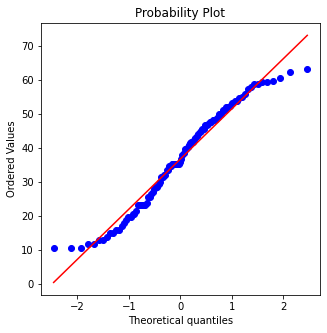

In [363]:
guas_check(df, 'exp_trans')

# Very close to a normal distribution

#### Box Cox Transformation

Formula:

- T(Y)=(Y exp(λ)−1)/λ

Where
- T(Y) represents transformed feature
- Y is the feature
- Y exp(λ)--> Y**λ
- λ is a paramater, it check all the values from -5 to 5, and considers a the optimum value for the selected feature.

In [383]:
df['rand_feat'] = np.random.randint(1, 100, 100)

In [390]:
df.head()

,feat,log_feat,recip_feat,sq_feat,exp_feat,log_trans,recip_trans,rand_feat,sq_trans,exp_trans
0,0.448047,1.565252,2.231911,0.200746,2.484907,0.448047,0.448047,8,0.448047,11.873102
1,-0.498756,0.607286,-2.004990,0.248757,4.007333,-0.498756,-0.498756,18,0.498756,43.524223
2,1.093471,2.984614,0.914519,1.195678,3.178054,1.093471,1.093471,94,1.093471,23.174790
3,0.460825,1.585381,2.170023,0.212359,4.488636,0.460825,0.460825,34,0.460825,59.242147
4,0.655084,1.925305,1.526521,0.429136,2.397895,0.655084,0.655084,60,0.655084,10.776694


<AxesSubplot:xlabel='rand_feat', ylabel='Count'>

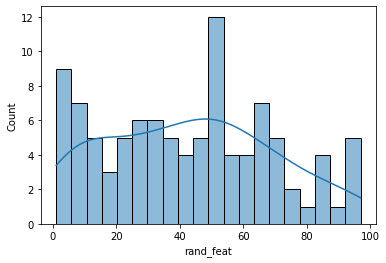

In [391]:
sns.histplot(df['rand_feat'], kde=True, bins = 20)

# Not so proper

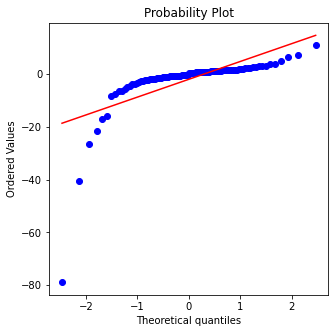

In [392]:
guas_check(df, 'recip_feat')

# not close to normal distribution

In [393]:
# If boxcox transformation works for this kind of data, then the result would be like this

df['rand_boxcox'], lamb_da =stats.boxcox(df['rand_feat'])

In [394]:
lamb_da

# this the optimum lambda values

0.6415639323034511

<AxesSubplot:xlabel='rand_boxcox', ylabel='Count'>

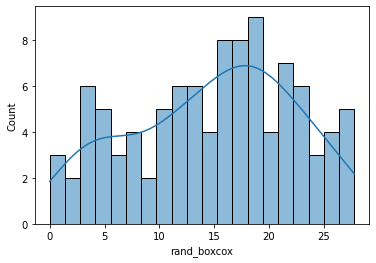

In [395]:
sns.histplot(df['rand_boxcox'], kde=True, bins = 20)

# Looks like a normal distribution

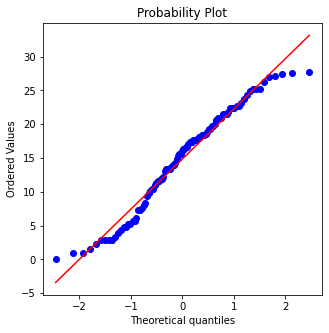

In [396]:
guas_check(df, 'rand_boxcox')

# Very close to a normal distribution